## Crop landsat with polygon

In [6]:
import os
import glob
import numpy as np
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es

import cartopy as cp
import warnings
warnings.filterwarnings("ignore")


In [ ]:
all_data=glob.glob('/home/junsaito/Raster/*.TIF')
#files = list(data_home.glob('*.h5'))
files = list(all_data)

for image_path in files[:10]: print(image_path)
print('Total number of files:', len(files))


In [351]:
files.sort()
files

['/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B1.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B2.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B3.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B4.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B5.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B6.TIF',
 '/home/junsaito/Raster/LT05_L1TP_007013_19870812_20170211_01_T1_B7.TIF']

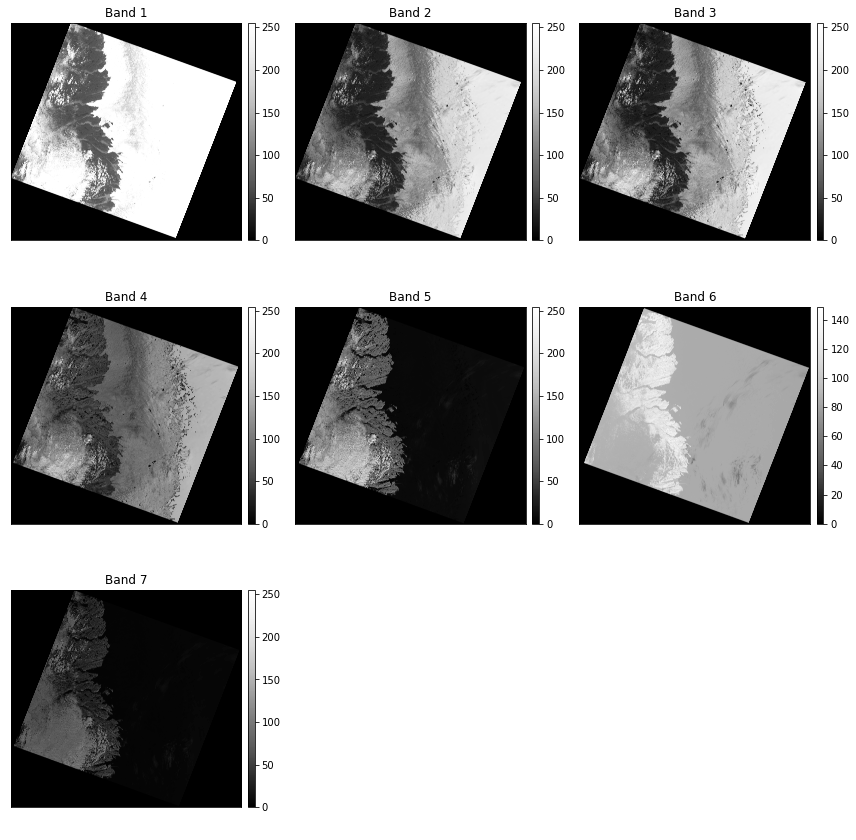

In [352]:
landsat_post_arr, landsat_post_meta = es.stack(files)
ep.plot_bands(landsat_post_arr)
plt.show()

crop extent crs:  epsg:32622
image crs:  EPSG:32622


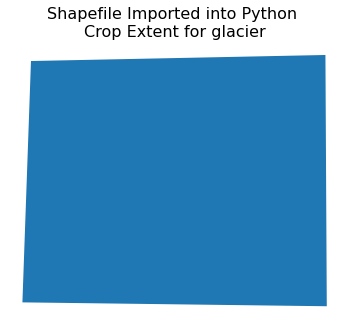

In [353]:
import geopandas as gpd
crop_bound = gpd.read_file("ice.shp")
print('crop extent crs: ', crop_bound.crs)
print('image crs: ', image_profile['crs'])

# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
crop_bound.plot(ax=ax)
ax.set_title("Shapefile Imported into Python \nCrop Extent for glacier",fontsize = 16)
ax.set_axis_off();

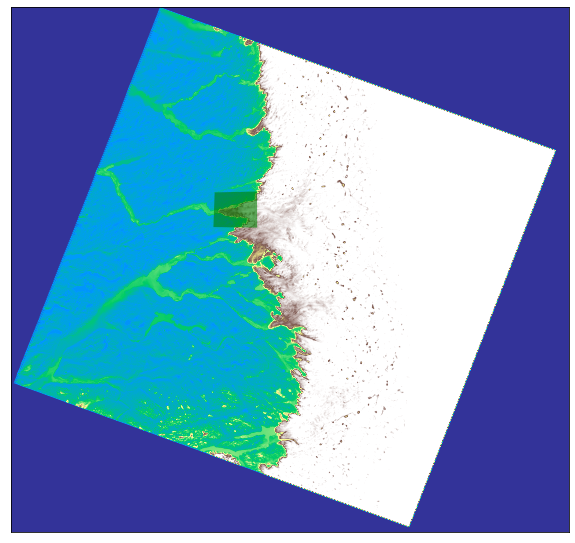

In [355]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(data_im,
              cmap='terrain',
              extent=extent,
              ax=ax,
              cbar=False)
crop_bound.plot(ax=ax, alpha=.6, color='g');

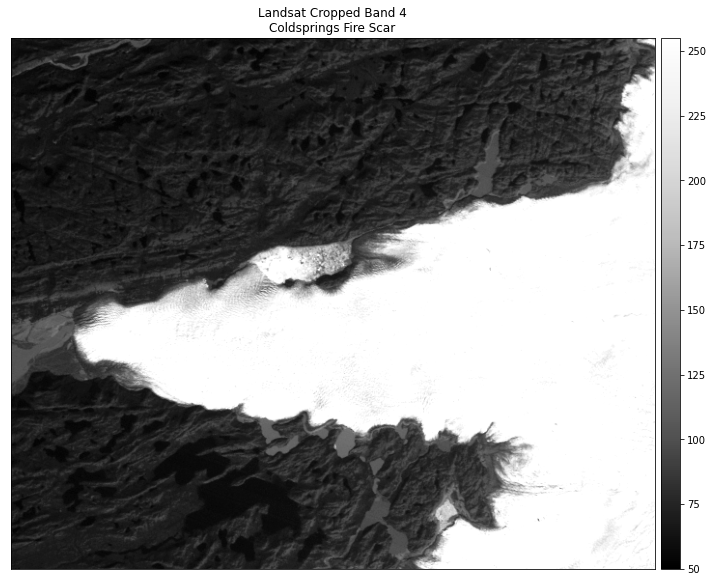

In [356]:
# Open a single band and plot
with rio.open(files[0]) as src:

    # Reproject the fire boundary shapefile to be the same CRS as the Landsat data
    crop_raster_profile = src.profile
    fire_boundary_utm22n = crop_bound.to_crs(crop_raster_profile["crs"])

    # Crop the landsat image to the extent of the fire boundary
    landsat_band, landsat_metadata = es.crop_image(src, fire_boundary_utm22n)

ep.plot_bands(landsat_band[0],
              title="Landsat Cropped Band 4\nColdsprings Fire Scar",
              scale=False)

plt.show()

In [357]:
# Our data folder 
data_home = Path('/home/junsaito/Raster/cropped_dir')

# Create folder if it doesn't exist
data_home.mkdir(exist_ok=True)    


# Crop your data
cropped_file_list = es.crop_all(raster_paths=files,
                                output_dir=data_home,
                                geoms=fire_boundary_utm22n,
                                overwrite=True,
                                verbose=True)
# Note that because the original tif files ended with _crop you have an awkward
# Output name. crop_all by default adds _crop to the end of your newly cropped files
cropped_file_list


['/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B1_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B2_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B3_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B4_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B5_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B6_crop.TIF',
 '/home/junsaito/Raster/cropped_dir/LT05_L1TP_007013_19870812_20170211_01_T1_B7_crop.TIF']

In [358]:
land_stack, land_meta = es.stack(band_paths=cropped_file_list)
land_stack

array([[[ 64,  63,  63, ..., 191, 190, 190],
        [ 65,  65,  66, ..., 205, 196, 187],
        [ 66,  66,  66, ..., 247, 231, 229],
        ...,
        [ 65,  66,  66, ..., 255, 245, 240],
        [ 71,  71,  67, ..., 245, 255, 248],
        [ 74,  67,  64, ..., 246, 253, 253]],

       [[ 28,  28,  28, ...,  88,  87,  86],
        [ 29,  29,  28, ...,  95,  90,  86],
        [ 28,  29,  30, ..., 112, 107, 103],
        ...,
        [ 30,  28,  29, ..., 118, 110, 104],
        [ 32,  32,  31, ..., 106, 112, 108],
        [ 32,  30,  29, ..., 106, 111, 110]],

       [[ 26,  26,  26, ...,  88,  87,  85],
        [ 28,  28,  26, ...,  96,  90,  85],
        [ 26,  27,  28, ..., 111, 105, 101],
        ...,
        [ 28,  27,  28, ..., 114, 107, 103],
        [ 30,  30,  30, ..., 104, 110, 107],
        [ 32,  29,  28, ..., 104, 108, 109]],

       ...,

       [[ 79,  75,  74, ...,   7,   8,   7],
        [ 80,  80,  81, ...,   7,   7,   7],
        [ 73,  79,  78, ...,   8,   7,   8

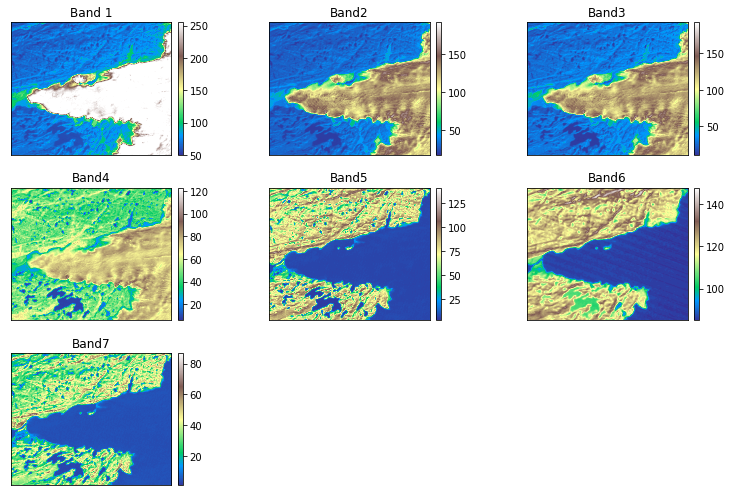

In [359]:
band_titles = ["Band 1", "Band2","Band3", "Band4","Band5", "Band6","Band7"]

ep.plot_bands(land_stack,
              figsize=(11, 7),
              title=band_titles,cmap='terrain')
plt.show()

In [232]:
#from pathlib import Path
#data_home = Path('/home/junsaito/Raster/out')

# Create folder if it doesn't exist
#data_home.mkdir(exist_ok=True)

#path_out = "/home/junsaito/Raster/out/test.tif"
#with rio.open(path_out, 'w', **data_meta) as ff:
    #ff.write(crop_bound[0],1)
    
